# Extract npz files and generate plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from FlexibleWM import *

import time
from datetime import datetime
import ipdb


In [2]:
# Start the timer
start_time = time.time()

# Set the current time as 'name_simu' (e.g., formatted as Year-Month-Day_Hour-Minute-Second)
time_simu = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
print(f"Simulation start time: {time_simu}")

# sim_name = 'trials/{time_simu}'
sim_name = 'trials/{time_simu}'

folder_path = f'./FlexibleWM/{sim_name}'

dictionnary={
    'name_simu':f'FlexibleWM/{sim_name}',
    'Number_of_trials':1,
    'specific_load':True,
    'value_of_specific_load':2  # number of items to remember. The specific location is random
    } # Add here any parameter you want to change from default. Defaults values are at the beginning of FlexibleWM.py
MyModel = FlexibleWM(dictionnary)
MyModel.run_a_trial()
gcPython.collect() 

# End the timer
end_time = time.time()

# Calculate the total running time
total_time = end_time - start_time
print(f"Total running time: {total_time:.2f} seconds")

Simulation name: 2024-09-24_18-19-05
Initializing the weights of the network that will be used for all trials 
 


INFO:root:creating /var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_wnkotvq6/var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_wnkotvq6
INFO:root:arm64-apple-darwin20.0.0-clang++ -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -fvisibility-inlines-hidden -fmessage-length=0 -isystem /Users/derek/anaconda3/envs/py39/include -D_FORTIFY_SOURCE=2 -isystem /Users/derek/anaconda3/envs/py39/include -c /var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_wnkotvq6/flag_test.cpp -o /var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_wnkotvq6/var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_wnkotvq6/flag_test.o -w
INFO:root:creating /var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_jjbukk12/var/folders/tr/k4p6cxld3ql638sby8p0sr500000gn/T/brian_flag_test_jjbukk12
INFO:root:arm64-apple-darwin20.0.0-clang++ -ftree-vectorize -fPIC -fPIE -fstack-protector-strong -O2 -pipe -stdlib=libc++ -

---------- Initialisation of trial 0 ----------
Load for this trial is 2
Running...


  axes.plot(spike_times/time_unit, spike_indices, '.', **kwds)



Plot of a raster into the folder ..
Tuning curve is saved in the folder, next time you can include 'compute_tuning_curve':False to reuse it

---------- ML decoding at the end of trial 0 ----------
Initial inputs were (nan means no initial input into this SN)
[302.  nan  nan  nan  nan  nan 402.  nan]
Memory is found 
[ True False False False False False  True False]
ML decoding gives
[302. 504. 401. 361.  56. 227. 389. 215.]
Decoding from the activity vector gives
[298.75800104 265.80374097 242.55825671 353.26326215 398.06234301
 188.63065451 392.84312609 291.79115756]


---------- Computing capacity, maintained and spurious memories ----------
2 maintained memories
0 forgotten memories
0 spurious memories

All results saved in the folder
Total running time: 18.37 seconds


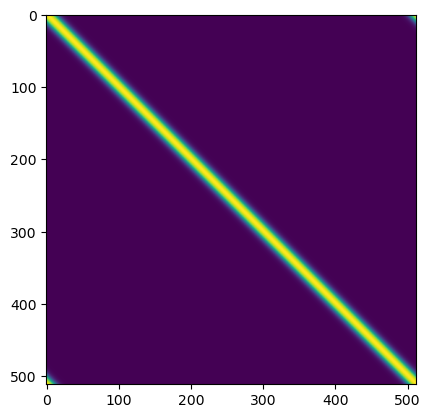

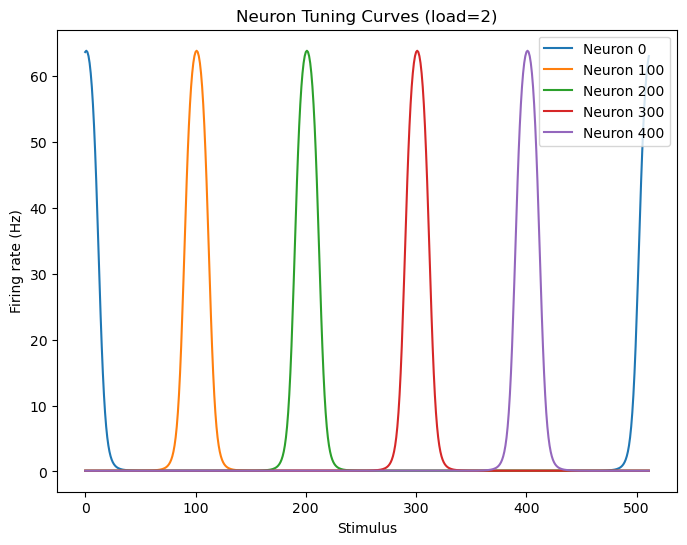

In [5]:
# Load the Matrix_tuning.npz file
npzfile = np.load(f'{folder_path}/Matrix_tuning.npz')
Matrix_tuning = npzfile['Matrix_tuning']
npzfile.close()

plt.imshow(Matrix_tuning)

# Select some neurons (rows) to plot tuning curves for
neuron_indices = [0, 100, 200, 300, 400]  # Example neurons to plot

# Plot tuning curves for the selected neurons
plt.figure(figsize=(8, 6))

for i in neuron_indices:
    plt.plot(Matrix_tuning[i, :], label=f'Neuron {i}')

load = dictionnary['value_of_specific_load']
plt.title(f'Neuron Tuning Curves (load={load})')
plt.xlabel('Stimulus')
plt.ylabel('Firing rate (Hz)')
plt.legend()
plt.show()

Array names: ['Matrix_all_results', 'Matrix_abs_all', 'Matrix_angle_all', 'Results_ml_spikes', 'Drift_from_ml_spikes', 'Matrix_initial_input']
Matrix_all_results: [[1. 0.]]


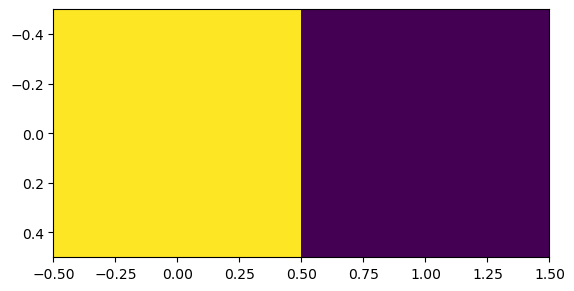

In [4]:
# Load the .npz file
npzfile = np.load(f'{folder_path}/simulation_results.npz')

# List all the arrays stored in the .npz file
print("Array names:", npzfile.files)

# # Access individual arrays by their names
Matrix_all_results = npzfile['Matrix_all_results']
# array2 = npzfile['array_name2']
print('Matrix_all_results:',Matrix_all_results)
plt.imshow(Matrix_all_results)
# Example: print one of the arrays
# print(array1)

# # Close the file after accessing the arrays
npzfile.close()